<a href="https://colab.research.google.com/github/koalalovepabro/Stock-Portfolio-Optimization/blob/main/Test/Stock_Portfolio(mmt_3month)_ver2.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📈 종목선택 방법**
- 모멘텀 3개월
- 최근에 가장 많이 오른 종목 매수한 후 일정 기간을 보유한 후 파는 전략
- 60 영업일(3개월) 수익률 순위 보여줌


# **📊 포트폴리오 최적화 방법**  
1. **✔ Max Sharpe Ratio** : 샤프비율이 최대가 되도록 포트폴리오 최적화  
    => 수익률과 변동성을 모두 고려
2. **Efficient Risk**   : 주어진 변동성 ( target_volatility ) 보다 낮은 범위 내에서 수익률 (Return)이 최대가 되도록 포트폴리오 최적화  
    => 높은 이익을 추구하기 보다는, 비교적 위험이 낮은 투자를 원하는 투자자에게 추천
3. **Efficient Return** : 주어진 리스크 ( target_return )을 만족시키는 선에서 변동성(volatility)를 최소가 되도록 포트폴리오 최적화  
    => 높은 위험을 감수하더라도, 높은 이익을 추구하는 투자 성향을 가진 투자자에게 추천

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
!pip install -q install finance-datareader

In [3]:
!pip install pykrx

     |████████████████████████████████| 81 kB 3.9 MB/s 
     |████████████████████████████████| 60 kB 6.4 MB/s 
     |████████████████████████████████| 251 kB 17.7 MB/s 


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
from pykrx import stock
import datetime

In [ ]:
# 오늘 KOSPI&KOSDAQ 종목 전체 불러오기
today = datetime.datetime.today().strftime("%Y%m%d")
kospi = stock.get_market_fundamental_by_ticker(today, market='KOSPI').index
kosdaq = stock.get_market_fundamental_by_ticker(today, market='KOSDAQ').index
stocks = kospi.append(kosdaq)
stocks

Index(['095570', '006840', '027410', '282330', '138930', '001460', '001465',
       '001040', '079160', '00104K',
       ...
       '065510', '243070', '084110', '263920', '145020', '024060', '010240',
       '189980', '037440', '238490'],
      dtype='object', name='티커', length=2391)

# 종목이름과 종목 코드

In [5]:
###########추가#############
kospi_temp = fdr.StockListing('KOSPI')[['Symbol', 'Name']]
kosdaq_temp = fdr.StockListing('KOSDAQ')[['Symbol', 'Name']]
code_name_dict = pd.concat([kospi_temp,kosdaq_temp])
code_name_dict = code_name_dict.set_index('Symbol').to_dict().get('Name')
code_name_dict

{'095570': 'AJ네트웍스',
 '006840': 'AK홀딩스',
 '152100': 'ARIRANG 200',
 '295820': 'ARIRANG 200동일가중',
 '253150': 'ARIRANG 200선물레버리지',
 '253160': 'ARIRANG 200선물인버스2X',
 '395750': 'ARIRANG ESG가치주액티브',
 '395760': 'ARIRANG ESG성장주액티브',
 '278420': 'ARIRANG ESG우수기업',
 '292750': 'ARIRANG KRX300',
 '309210': 'ARIRANG KRX300헬스케어',
 '333940': 'ARIRANG KS로우볼가중TR',
 '333950': 'ARIRANG KS로우사이즈가중TR',
 '333960': 'ARIRANG KS모멘텀가중TR',
 '333970': 'ARIRANG KS밸류가중TR',
 '333980': 'ARIRANG KS퀄리티가중TR',
 '269530': 'ARIRANG S&P글로벌인프라',
 '251590': 'ARIRANG 고배당저변동50',
 '161510': 'ARIRANG 고배당주',
 '251600': 'ARIRANG 고배당주채권혼합',
 '289670': 'ARIRANG 국채선물10년',
 '298340': 'ARIRANG 국채선물3년',
 '189400': 'ARIRANG 글로벌MSCI(합성 H)',
 '278620': 'ARIRANG 단기채권액티브',
 '269540': 'ARIRANG 미국S&P500(H)',
 '287180': 'ARIRANG 미국나스닥기술주',
 '213630': 'ARIRANG 미국다우존스고배당주(합성 H)',
 '332610': 'ARIRANG 미국단기우량회사채',
 '332620': 'ARIRANG 미국장기우량회사채',
 '195970': 'ARIRANG 선진국MSCI(합성 H)',
 '238670': 'ARIRANG 스마트베타Quality채권혼합',
 '195980': 'ARIRANG 신흥국MSCI(합성 H

## 3개월 모멘텀

In [ ]:
def momentum_3months(stocks): # 종목 list넣으면, 모멘텀 순위 있는 데이터프레임 출력
    df = pd.DataFrame()
    for s in stocks:
      df[s] = fdr.DataReader( s, '2021-01-01')['Close']
    
    # 60 영업일 수익률
    return_df = df.pct_change(60)
    return_df
    
    # 오늘 날짜
    today = datetime.datetime.today().strftime("%Y-%m-%d")
    
    # index는 종목 코드이고 모멘텀 데이터 있는 데이터 프레임으로 만들기
    s = return_df.loc[today]
    momentum_df = pd.DataFrame(s)
    momentum_df.columns = ["모멘텀"]
    
    momentum_df['순위'] = momentum_df['모멘텀'].rank(ascending=False)
    momentum_df = momentum_df.sort_values(by='순위')
    return momentum_df # 모멘텀

In [ ]:
momentum_3months_rank = momentum_3months(stocks)

In [ ]:
momentum_3months_rank

,모멘텀,순위
136510,4.555556,1.0
065440,2.842900,2.0
007390,2.336735,3.0
102460,2.189873,4.0
291230,1.989933,5.0
...,...,...
303530,NaN,NaN
276730,NaN,NaN
363250,NaN,NaN
365270,NaN,NaN


In [ ]:
momentum_3months_rank.head(30)

,모멘텀,순위
136510,4.555556,1.0
065440,2.842900,2.0
007390,2.336735,3.0
102460,2.189873,4.0
291230,1.989933,5.0
130660,1.828185,6.0
151860,1.799708,7.0
011000,1.762943,8.0
043100,1.712585,9.0
069640,1.668213,10.0


In [ ]:
momentum_3months_rank.tail(30)

,모멘텀,순위
101390,-0.430464,2362.0
004835,-0.436404,2363.0
139670,-0.459510,2364.0
032860,-0.477966,2365.0
156100,-0.495620,2366.0
064510,-0.506726,2367.0
007700,-0.577778,2368.0
221610,-0.631858,2369.0
383220,NaN,NaN
383800,NaN,NaN


In [ ]:
momentum_3months_rank.to_csv("momentum_3months_rank.csv")

## 미리 csv 파일로 저장해 둔 모멘텀 3개월 결과 불러오기

In [6]:
momentum_3months_rank = pd.read_csv('momentum_3months_rank.csv')
momentum_3months_rank

,Unnamed: 0,모멘텀,순위
0,136510,4.555556,1.0
1,065440,2.842900,2.0
2,007390,2.336735,3.0
3,102460,2.189873,4.0
4,291230,1.989933,5.0
...,...,...,...
2386,303530,NaN,NaN
2387,276730,NaN,NaN
2388,363250,NaN,NaN
2389,365270,NaN,NaN


In [7]:
momentum_3months_rank.index = momentum_3months_rank['Unnamed: 0']
momentum_3months_rank

,Unnamed: 0,모멘텀,순위
Unnamed: 0,,,
136510,136510,4.555556,1.0
065440,065440,2.842900,2.0
007390,007390,2.336735,3.0
102460,102460,2.189873,4.0
291230,291230,1.989933,5.0
...,...,...,...
303530,303530,NaN,NaN
276730,276730,NaN,NaN
363250,363250,NaN,NaN


In [8]:
momentum_3months_rank = momentum_3months_rank.drop('Unnamed: 0', axis=1)
momentum_3months_rank

,모멘텀,순위
Unnamed: 0,,
136510,4.555556,1.0
065440,2.842900,2.0
007390,2.336735,3.0
102460,2.189873,4.0
291230,1.989933,5.0
...,...,...
303530,NaN,NaN
276730,NaN,NaN
363250,NaN,NaN


### 모멘텀 3개월 종목 저장

In [9]:
import requests

In [10]:
assets = np.array(momentum_3months_rank.index[:30])
assets

array(['136510', '065440', '007390', '102460', '291230', '130660',
       '151860', '011000', '043100', '069640', '196700', '024740',
       '185490', '003925', '215090', '189860', '049480', '048550',
       '001440', '289220', '006660', '002410', '104620', '016920',
       '189330', '041510', '205500', '090150', '171090', '011700'],
      dtype=object)

In [11]:
len(assets)

30

### 3년치 주가 데이터 가져오기

In [12]:
# 종목별 종가 가져오기
from datetime import datetime

#시작일
start_date = '2018-07-19'

# today = datetime.today().strftime('%Y-%m-%d')
end_date = '2021-07-19'

# 각 주식의 일별 종가 데이터를 저장할 데이터 프레임을 생성
#Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

# FinanceDataReader로 각 종목의 종가데이터 불러오기
for stock in assets:
  df[stock] = fdr.DataReader(stock, start_date, end_date)['Close']
df

,136510,065440,007390,102460,291230,130660,151860,011000,043100,069640,196700,024740,185490,003925,215090,189860,049480,048550,001440,289220,006660,002410,104620,016920,189330,041510,205500,090150,171090,011700
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-19,10550,1597,8097,20695,NaN,3395,3765,4898,2356,8200,2385,1555,17066,208500,3032,4575,2425,2380,1140,NaN,10750,1735,NaN,1785,30500,40000,6060,1954,9899,2590
2018-07-20,10500,1656,7381,20695,NaN,3380,3750,4840,2646,8250,2350,1550,16648,209000,3052,4400,2425,2325,1130,NaN,10500,1750,NaN,1785,30200,38800,5990,1926,9866,2520
2018-07-23,10450,1585,6273,19616,NaN,3335,3650,4505,2486,8190,2295,1440,15170,209500,2909,4080,2475,2190,1095,NaN,10650,1620,NaN,1800,30000,37600,5870,1860,9665,2250
2018-07-24,10900,1614,6541,19420,NaN,3465,3730,4587,2377,8270,2298,1460,15170,209500,3110,4400,2450,2200,1155,NaN,10600,1665,NaN,1790,30300,38250,5890,1883,9665,2300
2018-07-25,10850,1568,6025,19028,NaN,3465,3650,4447,2369,8280,2298,1400,14373,206000,3039,4250,2350,2160,1135,NaN,10600,1650,NaN,1725,30300,38100,5860,1801,9498,2285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,39100,6060,29200,69000,7170.0,15250,22300,46050,1685,12400,6680,4580,41000,399000,1740,11450,6320,3070,2840,76000.0,26300,9500,10213.0,5650,81800,65400,5710,5200,29800,3060
2021-07-14,40100,6340,30800,69500,7370.0,14750,20950,47100,1770,14000,6510,5300,43350,393000,1750,10800,6700,3045,2845,82600.0,26500,8900,10263.0,5800,85000,65400,5950,5290,28850,3035
2021-07-15,37600,6470,30850,66900,7980.0,15500,20950,49800,1830,13100,6950,5400,43300,390000,1710,11100,6650,3020,2815,82600.0,26700,8860,10614.0,5850,84700,64400,7200,5450,28600,3945


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 740 entries, 2018-07-19 to 2021-07-19
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   136510  740 non-null    int64  
 1   065440  740 non-null    int64  
 2   007390  740 non-null    int64  
 3   102460  740 non-null    int64  
 4   291230  701 non-null    float64
 5   130660  740 non-null    int64  
 6   151860  740 non-null    int64  
 7   011000  740 non-null    int64  
 8   043100  740 non-null    int64  
 9   069640  740 non-null    int64  
 10  196700  740 non-null    int64  
 11  024740  740 non-null    int64  
 12  185490  740 non-null    int64  
 13  003925  740 non-null    int64  
 14  215090  740 non-null    int64  
 15  189860  740 non-null    int64  
 16  049480  740 non-null    int64  
 17  048550  740 non-null    int64  
 18  001440  740 non-null    int64  
 19  289220  82 non-null     float64
 20  006660  740 non-null    int64  
 21  002410  740 non-null

In [14]:
df.isnull().sum()

136510      0
065440      0
007390      0
102460      0
291230     39
130660      0
151860      0
011000      0
043100      0
069640      0
196700      0
024740      0
185490      0
003925      0
215090      0
189860      0
049480      0
048550      0
001440      0
289220    658
006660      0
002410      0
104620    130
016920      0
189330      0
041510      0
205500      0
090150      0
171090      0
011700      0
dtype: int64

In [15]:
# 결측값 있는 열 삭제 
df2 = df.dropna(axis = 1)
df2

,136510,065440,007390,102460,130660,151860,011000,043100,069640,196700,024740,185490,003925,215090,189860,049480,048550,001440,006660,002410,016920,189330,041510,205500,090150,171090,011700
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-19,10550,1597,8097,20695,3395,3765,4898,2356,8200,2385,1555,17066,208500,3032,4575,2425,2380,1140,10750,1735,1785,30500,40000,6060,1954,9899,2590
2018-07-20,10500,1656,7381,20695,3380,3750,4840,2646,8250,2350,1550,16648,209000,3052,4400,2425,2325,1130,10500,1750,1785,30200,38800,5990,1926,9866,2520
2018-07-23,10450,1585,6273,19616,3335,3650,4505,2486,8190,2295,1440,15170,209500,2909,4080,2475,2190,1095,10650,1620,1800,30000,37600,5870,1860,9665,2250
2018-07-24,10900,1614,6541,19420,3465,3730,4587,2377,8270,2298,1460,15170,209500,3110,4400,2450,2200,1155,10600,1665,1790,30300,38250,5890,1883,9665,2300
2018-07-25,10850,1568,6025,19028,3465,3650,4447,2369,8280,2298,1400,14373,206000,3039,4250,2350,2160,1135,10600,1650,1725,30300,38100,5860,1801,9498,2285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,39100,6060,29200,69000,15250,22300,46050,1685,12400,6680,4580,41000,399000,1740,11450,6320,3070,2840,26300,9500,5650,81800,65400,5710,5200,29800,3060
2021-07-14,40100,6340,30800,69500,14750,20950,47100,1770,14000,6510,5300,43350,393000,1750,10800,6700,3045,2845,26500,8900,5800,85000,65400,5950,5290,28850,3035
2021-07-15,37600,6470,30850,66900,15500,20950,49800,1830,13100,6950,5400,43300,390000,1710,11100,6650,3020,2815,26700,8860,5850,84700,64400,7200,5450,28600,3945


### 종목별 연평균 기대수익률 & 일간수익률의 공분산

In [16]:
!pip install PyPortfolioOpt

     |████████████████████████████████| 60 kB 3.2 MB/s 
     |████████████████████████████████| 2.7 MB 8.7 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [17]:
# Optimize the portfolio
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

#### ver01> 종가에 결측값이 있는 종목을 삭제하지 않은 df로 포트폴리오 구성 ( 30개 종목 )

In [18]:
# Calculate the expected annualized returns
# 복리 연평균 수익률
# return (1 + returns).prod() ** (frequency / returns.count()) - 1
mu = expected_returns.mean_historical_return(df)

# Calculate the annualized sample covariance matrix of the daily asset returns
S = risk_models.sample_cov(df)

In [19]:
mu

136510     0.549413
065440     0.638104
007390     0.589228
102460     0.469596
291230     0.465929
130660     0.694829
151860     0.789651
011000     1.232125
043100    -0.115291
069640     0.154612
196700     0.365017
024740     0.498344
185490     0.365521
003925     0.226030
215090    -0.121315
189860     0.361153
049480     0.436163
048550     0.079680
001440     0.351069
289220    40.879485
006660     0.367212
002410     0.697577
104620    -0.032231
016920     0.472299
189330     0.422897
041510     0.163103
205500     0.037456
090150     0.579063
171090     0.441020
011700     0.183033
dtype: float64

In [20]:
len(mu)

30

In [21]:
S

,136510,065440,007390,102460,291230,130660,151860,011000,043100,069640,196700,024740,185490,003925,215090,189860,049480,048550,001440,289220,006660,002410,104620,016920,189330,041510,205500,090150,171090,011700
136510,0.675205,0.106758,0.090744,0.078838,0.026346,0.072076,0.092655,0.029052,0.038086,0.060459,0.190424,0.035409,0.086125,0.054658,0.100857,0.127165,0.122322,0.102609,0.128246,0.012927,0.023302,0.085662,0.090865,0.076935,-0.017147,0.071345,0.059663,0.074828,0.106117,0.064143
065440,0.106758,0.480319,0.108589,0.157315,0.048542,0.052769,0.108229,0.068350,0.023303,0.100820,0.090799,0.138331,0.163619,0.047990,0.112748,0.095615,0.208405,0.091899,0.086336,-0.104649,0.033877,0.119627,0.105221,0.104069,-0.024787,0.085759,0.068439,0.092534,0.119450,0.099805
007390,0.090744,0.108589,0.734352,0.151970,-0.006457,0.021664,0.074487,0.106834,0.020454,0.084953,0.048732,0.021738,0.204781,0.039716,0.066202,0.044395,0.096402,0.063757,0.081541,0.085509,0.032580,0.089750,0.056511,0.094291,0.057154,0.078426,0.050354,0.051091,0.086537,0.077099
102460,0.078838,0.157315,0.151970,0.459622,0.021169,0.083718,0.108324,0.115050,0.026385,0.071702,0.097154,0.110383,0.232942,0.078726,0.090653,0.121345,0.136714,0.084710,0.112272,-0.177847,0.039375,0.100330,0.123872,0.098485,0.015964,0.098290,0.108779,0.110294,0.076611,0.081934
291230,0.026346,0.048542,-0.006457,0.021169,0.234591,-0.009460,0.039116,0.010754,-0.018609,-0.014300,-0.028494,0.049906,-0.000108,0.059057,0.014630,-0.019040,0.027692,0.030883,-0.000077,0.087469,0.005140,-0.000210,0.025916,0.029918,-0.001090,0.026539,-0.031420,0.007195,0.030776,0.010482
130660,0.072076,0.052769,0.021664,0.083718,-0.009460,0.245324,0.045174,0.020800,0.016768,0.032480,0.065026,-0.000218,0.045509,0.018985,0.065717,0.146094,0.053243,0.041478,0.065574,-0.026874,0.013337,0.056864,0.061208,0.019598,-0.004740,0.024477,0.059862,0.098871,0.051155,0.051730
151860,0.092655,0.108229,0.074487,0.108324,0.039116,0.045174,0.349486,0.104861,0.026822,0.084409,0.088815,0.041447,0.102851,0.067232,0.060614,0.066120,0.116515,0.087252,0.074812,0.076600,0.051384,0.107958,0.056132,0.058981,-0.000340,0.070356,0.063627,0.055425,0.114379,0.065786
011000,0.029052,0.068350,0.106834,0.115050,0.010754,0.020800,0.104861,1.096236,0.059471,0.036441,0.067710,0.007920,0.135283,-0.001025,0.033200,0.010746,0.060167,0.002562,0.030084,-0.227293,0.031135,0.057784,0.032330,0.077694,0.000759,-0.012016,0.059275,0.063753,0.048507,0.038829
043100,0.038086,0.023303,0.020454,0.026385,-0.018609,0.016768,0.026822,0.059471,0.332094,0.022659,0.036678,0.012470,0.078229,-0.006508,0.040772,0.021130,0.037876,0.021409,0.001249,-0.059349,0.036522,0.038774,0.015466,0.059813,-0.015638,0.013553,0.034468,0.017216,0.038472,0.022555
069640,0.060459,0.100820,0.084953,0.071702,-0.014300,0.032480,0.084409,0.036441,0.022659,0.277197,0.053183,0.054875,0.069713,0.025023,0.046947,0.068514,0.104099,0.044627,0.064677,0.042460,0.037078,0.059528,0.067264,0.045760,-0.011677,0.058473,0.038618,0.046946,0.079596,0.045558


In [22]:
len(S)

30

In [23]:
S.shape

(30, 30)

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


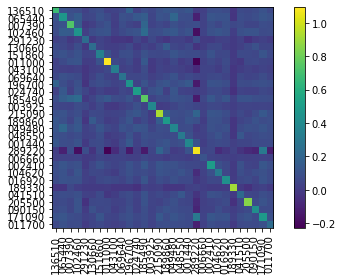

In [24]:
# 수익률의 공분산
from pypfopt import plotting

plotting.plot_covariance(S)

#### ver02> 종가에 결측값이 있는 종목을 삭제한 df2로 포트폴리오 구성 ( 27개 종목 )

In [25]:
# Calculate the expected annualized returns
# 복리 연평균 수익률
# return (1 + returns).prod() ** (frequency / returns.count()) - 1
mu2 = expected_returns.mean_historical_return(df2) 

# Calculate the annualized sample covariance matrix of the daily asset returns
S2 = risk_models.sample_cov(df2)

In [26]:
mu2

136510    0.549413
065440    0.638104
007390    0.589228
102460    0.469596
130660    0.694829
151860    0.789651
011000    1.232125
043100   -0.115291
069640    0.154612
196700    0.365017
024740    0.498344
185490    0.365521
003925    0.226030
215090   -0.121315
189860    0.361153
049480    0.436163
048550    0.079680
001440    0.351069
006660    0.367212
002410    0.697577
016920    0.472299
189330    0.422897
041510    0.163103
205500    0.037456
090150    0.579063
171090    0.441020
011700    0.183033
dtype: float64

In [27]:
len(mu2)

27

In [28]:
S2.shape

(27, 27)

In [29]:
len(S2)

27

In [30]:
S2

,136510,065440,007390,102460,130660,151860,011000,043100,069640,196700,024740,185490,003925,215090,189860,049480,048550,001440,006660,002410,016920,189330,041510,205500,090150,171090,011700
136510,0.675205,0.106758,0.090744,0.078838,0.072076,0.092655,0.029052,0.038086,0.060459,0.190424,0.035409,0.086125,0.054658,0.100857,0.127165,0.122322,0.102609,0.128246,0.023302,0.085662,0.076935,-0.017147,0.071345,0.059663,0.074828,0.106117,0.064143
065440,0.106758,0.480319,0.108589,0.157315,0.052769,0.108229,0.068350,0.023303,0.100820,0.090799,0.138331,0.163619,0.047990,0.112748,0.095615,0.208405,0.091899,0.086336,0.033877,0.119627,0.104069,-0.024787,0.085759,0.068439,0.092534,0.119450,0.099805
007390,0.090744,0.108589,0.734352,0.151970,0.021664,0.074487,0.106834,0.020454,0.084953,0.048732,0.021738,0.204781,0.039716,0.066202,0.044395,0.096402,0.063757,0.081541,0.032580,0.089750,0.094291,0.057154,0.078426,0.050354,0.051091,0.086537,0.077099
102460,0.078838,0.157315,0.151970,0.459622,0.083718,0.108324,0.115050,0.026385,0.071702,0.097154,0.110383,0.232942,0.078726,0.090653,0.121345,0.136714,0.084710,0.112272,0.039375,0.100330,0.098485,0.015964,0.098290,0.108779,0.110294,0.076611,0.081934
130660,0.072076,0.052769,0.021664,0.083718,0.245324,0.045174,0.020800,0.016768,0.032480,0.065026,-0.000218,0.045509,0.018985,0.065717,0.146094,0.053243,0.041478,0.065574,0.013337,0.056864,0.019598,-0.004740,0.024477,0.059862,0.098871,0.051155,0.051730
151860,0.092655,0.108229,0.074487,0.108324,0.045174,0.349486,0.104861,0.026822,0.084409,0.088815,0.041447,0.102851,0.067232,0.060614,0.066120,0.116515,0.087252,0.074812,0.051384,0.107958,0.058981,-0.000340,0.070356,0.063627,0.055425,0.114379,0.065786
011000,0.029052,0.068350,0.106834,0.115050,0.020800,0.104861,1.096236,0.059471,0.036441,0.067710,0.007920,0.135283,-0.001025,0.033200,0.010746,0.060167,0.002562,0.030084,0.031135,0.057784,0.077694,0.000759,-0.012016,0.059275,0.063753,0.048507,0.038829
043100,0.038086,0.023303,0.020454,0.026385,0.016768,0.026822,0.059471,0.332094,0.022659,0.036678,0.012470,0.078229,-0.006508,0.040772,0.021130,0.037876,0.021409,0.001249,0.036522,0.038774,0.059813,-0.015638,0.013553,0.034468,0.017216,0.038472,0.022555
069640,0.060459,0.100820,0.084953,0.071702,0.032480,0.084409,0.036441,0.022659,0.277197,0.053183,0.054875,0.069713,0.025023,0.046947,0.068514,0.104099,0.044627,0.064677,0.037078,0.059528,0.045760,-0.011677,0.058473,0.038618,0.046946,0.079596,0.045558
196700,0.190424,0.090799,0.048732,0.097154,0.065026,0.088815,0.067710,0.036678,0.053183,0.458854,0.040753,0.111717,0.048683,0.102723,0.120833,0.084061,0.103820,0.141950,0.023421,0.106310,0.084900,-0.014094,0.081707,0.074987,0.089004,0.094448,0.086928


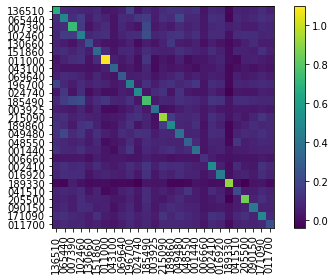

In [31]:
# 수익률의 공분산
from pypfopt import plotting

plotting.plot_covariance(S2)

# 포트폴리오 최적화 ( Max Sharpe ratio )

#### ver01> 결측값 삭제하지 않음 / df / mu, S / ef, cleaned_weights ( 30개 종목 )

In [32]:
!pip install PyPortfolioOpt

In [33]:
import pypfopt
pypfopt.__version__

'1.4.2'

In [34]:
# Efficient_risk로 최적화 했을때의 결과 확인
vol_limit = 0.3
ef = EfficientFrontier(mu, S)
ef.efficient_risk(vol_limit)
ef.portfolio_performance(verbose=True)

Expected annual return: 1163.8%
Annual volatility: 30.0%
Sharpe Ratio: 38.73


(11.637663274373745, 0.30000000000653254, 38.72554424706923)

In [35]:
# max_sharpe로 최적화 했을때의 결과 확인
ef = EfficientFrontier(mu, S)
ef.max_sharpe()
ef.portfolio_performance(verbose=True)

Expected annual return: 2040.6%
Annual volatility: 47.7%
Sharpe Ratio: 42.71


(20.406046874608354, 0.4773192536786198, 42.709458538486544)

In [36]:
# Max Sharpe Ratio
ef = EfficientFrontier(mu, S)  # Create the Efficient Frontier Object

weights = ef.max_sharpe()

cleaned_weights = ef.clean_weights()
print(cleaned_weights)

# calculates the expected return, volatility and Sharpe ratio for the optimized portfolio.
ef.portfolio_performance(verbose=True)

OrderedDict([('136510', 0.0), ('065440', 0.01915), ('007390', 0.0), ('102460', 0.1247), ('291230', 0.0), ('130660', 0.0), ('151860', 0.0), ('011000', 0.08735), ('043100', 0.03808), ('069640', 0.0), ('196700', 0.0699), ('024740', 0.0), ('185490', 0.0), ('003925', 0.0), ('215090', 0.0), ('189860', 0.0), ('049480', 0.0), ('048550', 0.0), ('001440', 0.0), ('289220', 0.49326), ('006660', 0.0), ('002410', 0.0), ('104620', 0.0), ('016920', 0.0), ('189330', 0.0), ('041510', 0.0), ('205500', 0.0), ('090150', 0.02985), ('171090', 0.0), ('011700', 0.13771)])
Expected annual return: 2040.6%
Annual volatility: 47.7%
Sharpe Ratio: 42.71


(20.406046874608354, 0.4773192536786198, 42.709458538486544)

In [37]:
weights

OrderedDict([('136510', 0.0),
             ('065440', 0.0191507045494509),
             ('007390', 0.0),
             ('102460', 0.1246997133473747),
             ('291230', 0.0),
             ('130660', 0.0),
             ('151860', 0.0),
             ('011000', 0.0873504179253408),
             ('043100', 0.0380834351570076),
             ('069640', 0.0),
             ('196700', 0.0698972415492677),
             ('024740', 0.0),
             ('185490', 0.0),
             ('003925', 0.0),
             ('215090', 0.0),
             ('189860', 0.0),
             ('049480', 0.0),
             ('048550', 0.0),
             ('001440', 0.0),
             ('289220', 0.4932553672806995),
             ('006660', 0.0),
             ('002410', 0.0),
             ('104620', 0.0),
             ('016920', 0.0),
             ('189330', 0.0),
             ('041510', 0.0),
             ('205500', 0.0),
             ('090150', 0.0298549984973862),
             ('171090', 0.0),
             ('011700', 0

In [38]:
len(weights)

30

In [39]:
cleaned_weights

OrderedDict([('136510', 0.0),
             ('065440', 0.01915),
             ('007390', 0.0),
             ('102460', 0.1247),
             ('291230', 0.0),
             ('130660', 0.0),
             ('151860', 0.0),
             ('011000', 0.08735),
             ('043100', 0.03808),
             ('069640', 0.0),
             ('196700', 0.0699),
             ('024740', 0.0),
             ('185490', 0.0),
             ('003925', 0.0),
             ('215090', 0.0),
             ('189860', 0.0),
             ('049480', 0.0),
             ('048550', 0.0),
             ('001440', 0.0),
             ('289220', 0.49326),
             ('006660', 0.0),
             ('002410', 0.0),
             ('104620', 0.0),
             ('016920', 0.0),
             ('189330', 0.0),
             ('041510', 0.0),
             ('205500', 0.0),
             ('090150', 0.02985),
             ('171090', 0.0),
             ('011700', 0.13771)])

In [40]:
len(cleaned_weights)

30

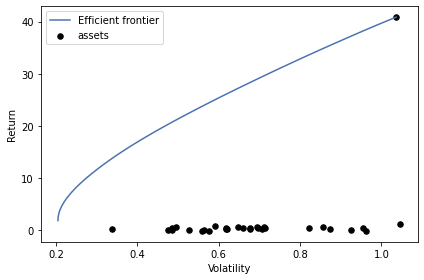

In [42]:
# 효율적 투자선와 각 종목의 수익률 & 변동성
import matplotlib.pyplot as plt

ef = EfficientFrontier(mu, S, solver='SCS')

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
plt.legend(loc='best')
plt.show()

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


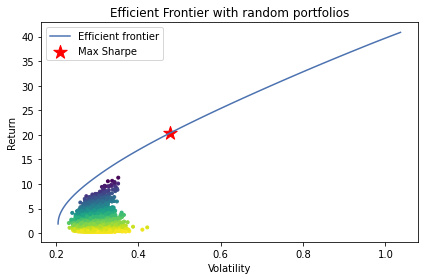

In [43]:
# Show Efficient Frontier
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find the tangency portfolio
ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()  # 기대수익률 , Risk(변동성)
ax.scatter(std_tangent, ret_tangent, marker="*", s=200, c="r", label="Max Sharpe")

# Generate random portfolios
n_samples = 20000
w = np.random.dirichlet(np.ones(len(mu)), n_samples) # 난수로 20000세트의 투자비중 만들기
rets = w.dot(mu)                                     # 기대수익률
stds = np.sqrt(np.diag(w @ S @ w.T))                 # Risk(변동성)
sharpes = rets / stds                                # 샤프비율

ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend(loc='best')
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()

In [44]:
# Max.Sharpe Ratio로 최적화한 포트폴리오의 수익률과 변동성, 샤프비율
ef.portfolio_performance(verbose=True)

Expected annual return: 2039.8%
Annual volatility: 47.7%
Sharpe Ratio: 42.71


(20.39830266912531, 0.4771675815346947, 42.70680460643073)

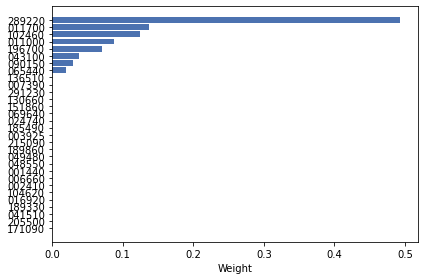

In [45]:
# 종목별 투자비중
plotting.plot_weights(weights, ax=None)

#### ver02> 결측값 삭제 / df2 / mu2, S2 / ef2, cleaned_weights2 ( 27개 종목 )

In [46]:
# Efficient_risk로 최적화 했을때의 결과 확인
vol_limit2 = 0.3
ef2 = EfficientFrontier(mu2, S2)
ef2.efficient_risk(vol_limit2)
ef2.portfolio_performance(verbose=True)

Expected annual return: 69.2%
Annual volatility: 30.0%
Sharpe Ratio: 2.24


(0.6919015616615388, 0.29999999997137405, 2.2396718724188385)

In [47]:
# max_sharpe로 최적화 했을때의 결과 확인
ef2 = EfficientFrontier(mu2, S2)
ef2.max_sharpe()
ef2.portfolio_performance(verbose=True)

Expected annual return: 65.2%
Annual volatility: 28.0%
Sharpe Ratio: 2.25


(0.6516480657781353, 0.280280967562221, 2.253624537092097)

In [48]:
# Max Sharpe Ratio
ef2 = EfficientFrontier(mu2, S2)  # Create the Efficient Frontier Object

weights2 = ef2.max_sharpe()

cleaned_weights2 = ef2.clean_weights()
print(cleaned_weights2)

# calculates the expected return, volatility and Sharpe ratio for the optimized portfolio.
ef2.portfolio_performance(verbose=True)

OrderedDict([('136510', 0.01722), ('065440', 0.01582), ('007390', 0.02764), ('102460', 0.0), ('130660', 0.26139), ('151860', 0.12917), ('011000', 0.10272), ('043100', 0.0), ('069640', 0.0), ('196700', 0.0), ('024740', 0.08217), ('185490', 0.0), ('003925', 0.0), ('215090', 0.0), ('189860', 0.0), ('049480', 0.0), ('048550', 0.0), ('001440', 0.0), ('006660', 0.18589), ('002410', 0.05103), ('016920', 0.03991), ('189330', 0.05401), ('041510', 0.0), ('205500', 0.0), ('090150', 0.03304), ('171090', 0.0), ('011700', 0.0)])
Expected annual return: 65.2%
Annual volatility: 28.0%
Sharpe Ratio: 2.25


(0.6516480657781353, 0.280280967562221, 2.253624537092097)

In [49]:
weights2

OrderedDict([('136510', 0.0172154143667338),
             ('065440', 0.0158227721621843),
             ('007390', 0.0276378635231135),
             ('102460', 0.0),
             ('130660', 0.2613942256994183),
             ('151860', 0.129167407690074),
             ('011000', 0.1027150029726632),
             ('043100', 0.0),
             ('069640', 0.0),
             ('196700', 0.0),
             ('024740', 0.0821701315044215),
             ('185490', 0.0),
             ('003925', 0.0),
             ('215090', 0.0),
             ('189860', 0.0),
             ('049480', 0.0),
             ('048550', 0.0),
             ('001440', 0.0),
             ('006660', 0.1858889038576003),
             ('002410', 0.0510339568150896),
             ('016920', 0.0399063262085831),
             ('189330', 0.0540115912120011),
             ('041510', 0.0),
             ('205500', 0.0),
             ('090150', 0.0330364039881173),
             ('171090', 0.0),
             ('011700', 0.0)])

In [50]:
len(weights2)

27

In [51]:
cleaned_weights2

OrderedDict([('136510', 0.01722),
             ('065440', 0.01582),
             ('007390', 0.02764),
             ('102460', 0.0),
             ('130660', 0.26139),
             ('151860', 0.12917),
             ('011000', 0.10272),
             ('043100', 0.0),
             ('069640', 0.0),
             ('196700', 0.0),
             ('024740', 0.08217),
             ('185490', 0.0),
             ('003925', 0.0),
             ('215090', 0.0),
             ('189860', 0.0),
             ('049480', 0.0),
             ('048550', 0.0),
             ('001440', 0.0),
             ('006660', 0.18589),
             ('002410', 0.05103),
             ('016920', 0.03991),
             ('189330', 0.05401),
             ('041510', 0.0),
             ('205500', 0.0),
             ('090150', 0.03304),
             ('171090', 0.0),
             ('011700', 0.0)])

In [52]:
len(cleaned_weights2)

27

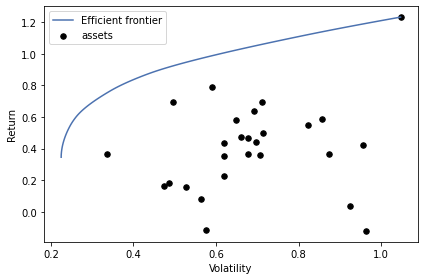

In [63]:
# 효율적 투자선와 각 종목의 수익률 & 변동성
import matplotlib.pyplot as plt

ef2 = EfficientFrontier(mu2, S2, solver='SCS')

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef2, ax=ax, show_assets=True)
plt.legend(loc='best')
plt.show()

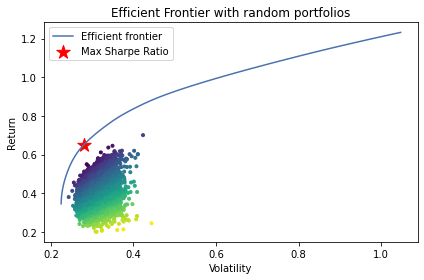

In [64]:
# Show Efficient Frontier
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef2, ax=ax, show_assets=False)

# efficient_risk
# vol_limit2 = 0.3
# ef2.efficient_risk(vol_limit2)
# ret_effr2, std_effr2, _ = ef2.portfolio_performance()
# ax.scatter(std_effr2, ret_effr2, marker="*", s=100, c="b", label="Efficient Risk")

# Find the tangency portfolio
ef2.max_sharpe()
ret_tangent2, std_tangent2, _ = ef2.portfolio_performance()  # 기대수익률 , Risk(변동성)
ax.scatter(std_tangent2, ret_tangent2, marker="*", s=200, c="r", label="Max Sharpe Ratio")

# Generate random portfolios
n_samples = 20000
w2 = np.random.dirichlet(np.ones(len(mu2)), n_samples) # 난수로 20000세트의 투자비중 만들기
rets2 = w2.dot(mu2)                                     # 기대수익률
stds2 = np.sqrt(np.diag(w2 @ S2 @ w2.T))                 # Risk(변동성)
sharpes2 = rets2 / stds2                                # 샤프비율

ax.scatter(stds2, rets2, marker=".", c=sharpes2, cmap="viridis_r")

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend(loc='best')
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()

In [65]:
# Efficient Risk로 최적화한 포트폴리오의 수익률과 변동성, 샤프비율
ef2.portfolio_performance(verbose=True)

Expected annual return: 65.2%
Annual volatility: 28.0%
Sharpe Ratio: 2.25


(0.6516489406751891, 0.2802814243729437, 2.253623985565002)

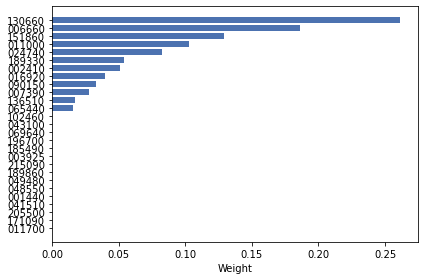

In [66]:
# 종목별 투자비중
plotting.plot_weights(weights2, ax=None)

### 투자금액과 포트폴리오의 비중에 맞추어 수량 할당

In [67]:
!pip install pulp

     |████████████████████████████████| 40.6 MB 32 kB/s 


#### ver01> 결측값 삭제하지 않음 / df / mu, S / ef, cleaned_weights ( 30개 종목 )

In [68]:
# Get the discrete allocation of each sharpe per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

# 투자금액 (단위: KRW)
portfolio_val = 15000000

latest_prices = get_latest_prices(df)

weights = cleaned_weights

da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=portfolio_val)

allocation, leftover = da.lp_portfolio(verbose=False)

print('Discrete Allocaion: ', allocation)
print('Funds Remaining: ', leftover, ' KRW')

rmse = da._allocation_rmse_error(verbose=False)

Discrete Allocaion:  {'065440': 43, '102460': 29, '011000': 25, '043100': 348, '196700': 177, '289220': 78, '090150': 61, '011700': 488}
Funds Remaining:  4010.0  KRW
Allocation has RMSE: 0.000


In [69]:
allocation

{'011000': 25,
 '011700': 488,
 '043100': 348,
 '065440': 43,
 '090150': 61,
 '102460': 29,
 '196700': 177,
 '289220': 78}

In [70]:
len(allocation)

8

#### ver02> 결측값 삭제하지 않음 / df2 / mu2, S2 / ef2, cleaned_weights2 /  ( 27개 종목 )

In [71]:
# Get the discrete allocation of each sharpe per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

# 투자금액 (단위: KRW)
portfolio_val = 15000000

latest_prices2 = get_latest_prices(df2)

weights2 = cleaned_weights2

da2 = DiscreteAllocation(weights2, latest_prices2, total_portfolio_value=portfolio_val)

allocation2, leftover2 = da2.lp_portfolio(verbose=False)

print('Discrete Allocaion: ', allocation2)
print('Funds Remaining: ', leftover2, ' KRW')

rmse2 = da2._allocation_rmse_error(verbose=False)

Discrete Allocaion:  {'136510': 7, '065440': 35, '007390': 13, '130660': 246, '151860': 94, '011000': 30, '024740': 242, '006660': 104, '002410': 94, '016920': 108, '189330': 9, '090150': 66}
Funds Remaining:  750.0  KRW
Allocation has RMSE: 0.001


In [72]:
allocation2

{'002410': 94,
 '006660': 104,
 '007390': 13,
 '011000': 30,
 '016920': 108,
 '024740': 242,
 '065440': 35,
 '090150': 66,
 '130660': 246,
 '136510': 7,
 '151860': 94,
 '189330': 9}

In [73]:
len(allocation2)

12

### 포트폴리오 결과로 보여줄 변수 저장

#### ver01> 결측값 삭제하지 않음 ( 30개 종목 )

In [74]:
# 각 종목별 실제 투자 금액
inv_total_price = {}

for i in allocation.keys():
  inv_total_price[i] = latest_prices.loc[i]*allocation[i]
inv_total_price

{'011000': 1290000.0,
 '011700': 2069120.0,
 '043100': 572460.0,
 '065440': 291970.0,
 '090150': 455060.0,
 '102460': 1856000.0,
 '196700': 1051380.0,
 '289220': 7410000.0}

In [75]:
# 총 투자금액
investment = 0

for i in inv_total_price.values():
    investment += i
print(investment)

14995990.0


In [76]:
portfolio_val-leftover

14995990.0

In [77]:
# 각 종목별 실제 투자 비중
inv_total_weight = {}

for i in allocation.keys():
  inv_total_weight[i] = inv_total_price[i]/investment
inv_total_weight

{'011000': 0.08602299681448174,
 '011700': 0.1379782195106825,
 '043100': 0.0381742052375335,
 '065440': 0.019469871612344366,
 '090150': 0.030345445682479117,
 '102460': 0.12376642022300628,
 '196700': 0.07011074293861226,
 '289220': 0.4941320979808602}

In [78]:
# 투자비중의 합계
investment_w = 0

for i in inv_total_weight.values():
    investment_w += i
print(investment_w)

1.0


In [79]:
# 결과값으로 불러올 값을 리스트로 저장
name_list = []                    # 종목명(회사이름)
total_price_stock =[]             # 각 종목별 실제 투자 금액
total_weight_stock = []           # 각 종목별 실제 투자 비중

for i in allocation.keys(): # i = 포트폴리오에 할당된 종목의 종목코드
    name_list.append(code_name_dict.get(i))
    total_price_stock.append(inv_total_price.get(i))
    total_weight_stock.append(inv_total_weight.get(i))

In [80]:
name_list

['이루온', '이연제약', '진원생명과학', '솔고바이오', '웹스', '자이언트스텝', '광진윈텍', '한신기계']

In [81]:
total_price_stock

[291970.0,
 1856000.0,
 1290000.0,
 572460.0,
 1051380.0,
 7410000.0,
 455060.0,
 2069120.0]

In [82]:
total_weight_stock

[0.019469871612344366,
 0.12376642022300628,
 0.08602299681448174,
 0.0381742052375335,
 0.07011074293861226,
 0.4941320979808602,
 0.030345445682479117,
 0.1379782195106825]

In [83]:
# Get the discrete allocation values
discrete_allocation_list = []
for symbol in allocation:
  discrete_allocation_list.append(allocation.get(symbol))

In [84]:
discrete_allocation_list

[43, 29, 25, 348, 177, 78, 61, 488]

In [85]:
# Create a dataframe for the portfolio
portfolio_df = pd.DataFrame(columns = ['종목명','종목코드','수량(주)', '투자금액(원)','투자비중'])
portfolio_df

,종목명,종목코드,수량(주),투자금액(원),투자비중


In [86]:
# portfolio_df['Company_name'] = company_name
portfolio_df['종목명'] = name_list
portfolio_df['종목코드'] = allocation
portfolio_df['수량(주)'] = discrete_allocation_list
portfolio_df['투자금액(원)'] = total_price_stock
portfolio_df['투자비중'] = total_weight_stock

In [87]:
portfolio_df

,종목명,종목코드,수량(주),투자금액(원),투자비중
0,이루온,065440,43,291970.0,0.019470
1,이연제약,102460,29,1856000.0,0.123766
2,진원생명과학,011000,25,1290000.0,0.086023
3,솔고바이오,043100,348,572460.0,0.038174
4,웹스,196700,177,1051380.0,0.070111
5,자이언트스텝,289220,78,7410000.0,0.494132
6,광진윈텍,090150,61,455060.0,0.030345
7,한신기계,011700,488,2069120.0,0.137978


In [88]:
# Sort by allocation & Show the portfolio
portfolio_df_sorted = portfolio_df.sort_values('투자비중', ascending = False)
portfolio_df_sorted = portfolio_df_sorted.reset_index(drop=True)
portfolio_df_sorted

,종목명,종목코드,수량(주),투자금액(원),투자비중
0,자이언트스텝,289220,78,7410000.0,0.494132
1,한신기계,011700,488,2069120.0,0.137978
2,이연제약,102460,29,1856000.0,0.123766
3,진원생명과학,011000,25,1290000.0,0.086023
4,웹스,196700,177,1051380.0,0.070111
5,솔고바이오,043100,348,572460.0,0.038174
6,광진윈텍,090150,61,455060.0,0.030345
7,이루온,065440,43,291970.0,0.019470


### 투자 금액에 따라 최적화된 포트폴리오의 종목별 수량

In [89]:
portfolio_df_sorted.loc["합계",2:] = portfolio_df_sorted.sum()
portfolio_df_sorted

,종목명,종목코드,수량(주),투자금액(원),투자비중
0,자이언트스텝,289220,78.0,7410000.0,0.494132
1,한신기계,011700,488.0,2069120.0,0.137978
2,이연제약,102460,29.0,1856000.0,0.123766
3,진원생명과학,011000,25.0,1290000.0,0.086023
4,웹스,196700,177.0,1051380.0,0.070111
5,솔고바이오,043100,348.0,572460.0,0.038174
6,광진윈텍,090150,61.0,455060.0,0.030345
7,이루온,065440,43.0,291970.0,0.019470
합계,NaN,NaN,1249.0,14995990.0,1.000000


#### ver02> 결측값 삭제 ( 27개 종목 )

In [90]:
# 각 종목별 실제 투자 금액
inv_total_price2 = {}

for i in allocation2.keys():
  inv_total_price2[i] = latest_prices2.loc[i]*allocation2[i]
inv_total_price2

{'002410': 769860,
 '006660': 2797600,
 '007390': 409500,
 '011000': 1548000,
 '016920': 599400,
 '024740': 1231780,
 '065440': 237650,
 '090150': 492360,
 '130660': 3923700,
 '136510': 266700,
 '151860': 1950500,
 '189330': 772200}

In [91]:
# 총 투자금액
investment2 = 0

for i in inv_total_price2.values():
    investment2 += i
print(investment2)

14999250


In [92]:
portfolio_val-leftover2

14999250.0

In [93]:
# 각 종목별 실제 투자 비중
inv_total_weight2 = {}

for i in allocation2.keys():
  inv_total_weight2[i] = inv_total_price2[i]/investment2
inv_total_weight2

{'002410': 0.05132656632831641,
 '006660': 0.18651599246628997,
 '007390': 0.027301365068253414,
 '011000': 0.1032051602580129,
 '016920': 0.03996199809990499,
 '024740': 0.08212277280530693,
 '065440': 0.015844125539610315,
 '090150': 0.032825641282064104,
 '130660': 0.2615930796539827,
 '136510': 0.017780889044452224,
 '151860': 0.13003983532509958,
 '189330': 0.05148257412870644}

In [94]:
# 투자비중의 합계
investment_w2 = 0

for i in inv_total_weight2.values():
    investment_w2 += i
print(investment_w2)

1.0


In [95]:
# 결과값으로 불러올 값을 리스트로 저장
name_list2 = []                    # 종목명(회사이름)
total_price_stock2 =[]             # 각 종목별 실제 투자 금액
total_weight_stock2 = []           # 각 종목별 실제 투자 비중

for i in allocation2.keys(): # i = 포트폴리오에 할당된 종목의 종목코드
    name_list2.append(code_name_dict.get(i))
    total_price_stock2.append(inv_total_price2.get(i))
    total_weight_stock2.append(inv_total_weight2.get(i))

In [96]:
name_list2

['쎄미시스코',
 '이루온',
 '네이처셀',
 '한전산업',
 'KG ETS',
 '진원생명과학',
 '한일단조',
 '삼성공조',
 '범양건영',
 '카스',
 '씨이랩',
 '광진윈텍']

In [97]:
total_price_stock2

[266700,
 237650,
 409500,
 3923700,
 1950500,
 1548000,
 1231780,
 2797600,
 769860,
 599400,
 772200,
 492360]

In [98]:
total_weight_stock2

[0.017780889044452224,
 0.015844125539610315,
 0.027301365068253414,
 0.2615930796539827,
 0.13003983532509958,
 0.1032051602580129,
 0.08212277280530693,
 0.18651599246628997,
 0.05132656632831641,
 0.03996199809990499,
 0.05148257412870644,
 0.032825641282064104]

In [99]:
# Get the discrete allocation values
discrete_allocation_list2 = []
for symbol in allocation2:
  discrete_allocation_list2.append(allocation2.get(symbol))

In [100]:
discrete_allocation_list2

[7, 35, 13, 246, 94, 30, 242, 104, 94, 108, 9, 66]

In [101]:
# Create a dataframe for the portfolio
portfolio_df2 = pd.DataFrame(columns = ['종목명','종목코드','수량(주)', '투자금액(원)','투자비중'])
portfolio_df2

,종목명,종목코드,수량(주),투자금액(원),투자비중


In [102]:
# portfolio_df['Company_name'] = company_name
portfolio_df2['종목명'] = name_list2
portfolio_df2['종목코드'] = allocation2
portfolio_df2['수량(주)'] = discrete_allocation_list2
portfolio_df2['투자금액(원)'] = total_price_stock2
portfolio_df2['투자비중'] = total_weight_stock2

In [103]:
portfolio_df2

,종목명,종목코드,수량(주),투자금액(원),투자비중
0,쎄미시스코,136510,7,266700,0.017781
1,이루온,065440,35,237650,0.015844
2,네이처셀,007390,13,409500,0.027301
3,한전산업,130660,246,3923700,0.261593
4,KG ETS,151860,94,1950500,0.130040
5,진원생명과학,011000,30,1548000,0.103205
6,한일단조,024740,242,1231780,0.082123
7,삼성공조,006660,104,2797600,0.186516
8,범양건영,002410,94,769860,0.051327
9,카스,016920,108,599400,0.039962


In [104]:
# Sort by allocation & Show the portfolio
portfolio_df_sorted2 = portfolio_df2.sort_values('투자비중', ascending = False)
portfolio_df_sorted2 = portfolio_df_sorted2.reset_index(drop=True)
portfolio_df_sorted2

,종목명,종목코드,수량(주),투자금액(원),투자비중
0,한전산업,130660,246,3923700,0.261593
1,삼성공조,006660,104,2797600,0.186516
2,KG ETS,151860,94,1950500,0.130040
3,진원생명과학,011000,30,1548000,0.103205
4,한일단조,024740,242,1231780,0.082123
5,씨이랩,189330,9,772200,0.051483
6,범양건영,002410,94,769860,0.051327
7,카스,016920,108,599400,0.039962
8,광진윈텍,090150,66,492360,0.032826
9,네이처셀,007390,13,409500,0.027301


### 투자 금액에 따라 최적화된 포트폴리오의 종목별 수량

In [105]:
portfolio_df_sorted2.loc["합계",2:] = portfolio_df_sorted2.sum()
portfolio_df_sorted2

,종목명,종목코드,수량(주),투자금액(원),투자비중
0,한전산업,130660,246.0,3923700.0,0.261593
1,삼성공조,006660,104.0,2797600.0,0.186516
2,KG ETS,151860,94.0,1950500.0,0.130040
3,진원생명과학,011000,30.0,1548000.0,0.103205
4,한일단조,024740,242.0,1231780.0,0.082123
5,씨이랩,189330,9.0,772200.0,0.051483
6,범양건영,002410,94.0,769860.0,0.051327
7,카스,016920,108.0,599400.0,0.039962
8,광진윈텍,090150,66.0,492360.0,0.032826
9,네이처셀,007390,13.0,409500.0,0.027301


# 포트폴리오의 수익률과 변동성을 벤치마크지수(KOSPI)와 비교

#### ver01> 결측값 삭제 ( 30개 종목 )

In [106]:
df

,136510,065440,007390,102460,291230,130660,151860,011000,043100,069640,196700,024740,185490,003925,215090,189860,049480,048550,001440,289220,006660,002410,104620,016920,189330,041510,205500,090150,171090,011700
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-19,10550,1597,8097,20695,NaN,3395,3765,4898,2356,8200,2385,1555,17066,208500,3032,4575,2425,2380,1140,NaN,10750,1735,NaN,1785,30500,40000,6060,1954,9899,2590
2018-07-20,10500,1656,7381,20695,NaN,3380,3750,4840,2646,8250,2350,1550,16648,209000,3052,4400,2425,2325,1130,NaN,10500,1750,NaN,1785,30200,38800,5990,1926,9866,2520
2018-07-23,10450,1585,6273,19616,NaN,3335,3650,4505,2486,8190,2295,1440,15170,209500,2909,4080,2475,2190,1095,NaN,10650,1620,NaN,1800,30000,37600,5870,1860,9665,2250
2018-07-24,10900,1614,6541,19420,NaN,3465,3730,4587,2377,8270,2298,1460,15170,209500,3110,4400,2450,2200,1155,NaN,10600,1665,NaN,1790,30300,38250,5890,1883,9665,2300
2018-07-25,10850,1568,6025,19028,NaN,3465,3650,4447,2369,8280,2298,1400,14373,206000,3039,4250,2350,2160,1135,NaN,10600,1650,NaN,1725,30300,38100,5860,1801,9498,2285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,39100,6060,29200,69000,7170.0,15250,22300,46050,1685,12400,6680,4580,41000,399000,1740,11450,6320,3070,2840,76000.0,26300,9500,10213.0,5650,81800,65400,5710,5200,29800,3060
2021-07-14,40100,6340,30800,69500,7370.0,14750,20950,47100,1770,14000,6510,5300,43350,393000,1750,10800,6700,3045,2845,82600.0,26500,8900,10263.0,5800,85000,65400,5950,5290,28850,3035
2021-07-15,37600,6470,30850,66900,7980.0,15500,20950,49800,1830,13100,6950,5400,43300,390000,1710,11100,6650,3020,2815,82600.0,26700,8860,10614.0,5850,84700,64400,7200,5450,28600,3945


In [107]:
cleaned_weights

OrderedDict([('136510', 0.0),
             ('065440', 0.01915),
             ('007390', 0.0),
             ('102460', 0.1247),
             ('291230', 0.0),
             ('130660', 0.0),
             ('151860', 0.0),
             ('011000', 0.08735),
             ('043100', 0.03808),
             ('069640', 0.0),
             ('196700', 0.0699),
             ('024740', 0.0),
             ('185490', 0.0),
             ('003925', 0.0),
             ('215090', 0.0),
             ('189860', 0.0),
             ('049480', 0.0),
             ('048550', 0.0),
             ('001440', 0.0),
             ('289220', 0.49326),
             ('006660', 0.0),
             ('002410', 0.0),
             ('104620', 0.0),
             ('016920', 0.0),
             ('189330', 0.0),
             ('041510', 0.0),
             ('205500', 0.0),
             ('090150', 0.02985),
             ('171090', 0.0),
             ('011700', 0.13771)])

In [108]:
len(cleaned_weights)

30

In [109]:
# 각 일자별, 종목별 종가에 해당 weights를 곱해주기
for i, weight in cleaned_weights.items():
    df[i] = df[i]*weight

In [110]:
df

,136510,065440,007390,102460,291230,130660,151860,011000,043100,069640,196700,024740,185490,003925,215090,189860,049480,048550,001440,289220,006660,002410,104620,016920,189330,041510,205500,090150,171090,011700
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-19,0.0,30.58255,0.0,2580.6665,NaN,0.0,0.0,427.84030,89.71648,0.0,166.7115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,58.32690,0.0,356.66890
2018-07-20,0.0,31.71240,0.0,2580.6665,NaN,0.0,0.0,422.77400,100.75968,0.0,164.2650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,57.49110,0.0,347.02920
2018-07-23,0.0,30.35275,0.0,2446.1152,NaN,0.0,0.0,393.51175,94.66688,0.0,160.4205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,55.52100,0.0,309.84750
2018-07-24,0.0,30.90810,0.0,2421.6740,NaN,0.0,0.0,400.67445,90.51616,0.0,160.6302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,56.20755,0.0,316.73300
2018-07-25,0.0,30.02720,0.0,2372.7916,NaN,0.0,0.0,388.44545,90.21152,0.0,160.6302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,53.75985,0.0,314.66735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,0.0,116.04900,0.0,8604.3000,0.0,0.0,0.0,4022.46750,64.16480,0.0,466.9320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37487.760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.22000,0.0,421.39260
2021-07-14,0.0,121.41100,0.0,8666.6500,0.0,0.0,0.0,4114.18500,67.40160,0.0,455.0490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40743.276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,157.90650,0.0,417.94985
2021-07-15,0.0,123.90050,0.0,8342.4300,0.0,0.0,0.0,4350.03000,69.68640,0.0,485.8050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40743.276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,162.68250,0.0,543.26595


In [111]:
# 일자별 종목의 (종가*비중) 합계를 Port열에 저장
df['Port'] = df.sum(axis = 1)
df

,136510,065440,007390,102460,291230,130660,151860,011000,043100,069640,196700,024740,185490,003925,215090,189860,049480,048550,001440,289220,006660,002410,104620,016920,189330,041510,205500,090150,171090,011700,Port
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-19,0.0,30.58255,0.0,2580.6665,NaN,0.0,0.0,427.84030,89.71648,0.0,166.7115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,58.32690,0.0,356.66890,3710.51313
2018-07-20,0.0,31.71240,0.0,2580.6665,NaN,0.0,0.0,422.77400,100.75968,0.0,164.2650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,57.49110,0.0,347.02920,3704.69788
2018-07-23,0.0,30.35275,0.0,2446.1152,NaN,0.0,0.0,393.51175,94.66688,0.0,160.4205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,55.52100,0.0,309.84750,3490.43558
2018-07-24,0.0,30.90810,0.0,2421.6740,NaN,0.0,0.0,400.67445,90.51616,0.0,160.6302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,56.20755,0.0,316.73300,3477.34346
2018-07-25,0.0,30.02720,0.0,2372.7916,NaN,0.0,0.0,388.44545,90.21152,0.0,160.6302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,53.75985,0.0,314.66735,3410.53317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,0.0,116.04900,0.0,8604.3000,0.0,0.0,0.0,4022.46750,64.16480,0.0,466.9320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37487.760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.22000,0.0,421.39260,51338.28590
2021-07-14,0.0,121.41100,0.0,8666.6500,0.0,0.0,0.0,4114.18500,67.40160,0.0,455.0490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40743.276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,157.90650,0.0,417.94985,54743.82895
2021-07-15,0.0,123.90050,0.0,8342.4300,0.0,0.0,0.0,4350.03000,69.68640,0.0,485.8050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40743.276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,162.68250,0.0,543.26595,54821.07635


In [112]:
# 일자별 종가의 전일대비 변동률(수익률)을 portfolio라는 데이터프레임으로 저장
portfolio = df[['Port']].pct_change()
portfolio

,Port
Date,
2018-07-19,NaN
2018-07-20,-0.001567
2018-07-23,-0.057835
2018-07-24,-0.003751
2018-07-25,-0.019213
...,...
2021-07-13,0.013843
2021-07-14,0.066335
2021-07-15,0.001411


In [113]:
# 코스피지수 불러오기
kospi = fdr.DataReader('KS11', start_date, end_date)[['Close']]
kospi

,Close
Date,
2018-07-19,2282.29
2018-07-20,2289.19
2018-07-23,2269.31
2018-07-24,2280.20
2018-07-25,2273.03
...,...
2021-07-13,3271.38
2021-07-14,3264.81
2021-07-15,3286.22


In [114]:
# 코스피지수의 변동률(수익률) 구하기
# 변동률(수익률) = (당일가격-전일가격) / 전일가격
# 7/20의 변동률(수익률) = (7/20 가격-7-19 가격) / 7/19 가격
kospi_pct = kospi.pct_change()
kospi_pct

,Close
Date,
2018-07-19,NaN
2018-07-20,0.003023
2018-07-23,-0.008684
2018-07-24,0.004799
2018-07-25,-0.003144
...,...
2021-07-13,0.007673
2021-07-14,-0.002008
2021-07-15,0.006558


In [115]:
# 코스피와 포트폴리오 합치기
result = kospi_pct.join(portfolio)
result

,Close,Port
Date,,
2018-07-19,NaN,NaN
2018-07-20,0.003023,-0.001567
2018-07-23,-0.008684,-0.057835
2018-07-24,0.004799,-0.003751
2018-07-25,-0.003144,-0.019213
...,...,...
2021-07-13,0.007673,0.013843
2021-07-14,-0.002008,0.066335
2021-07-15,0.006558,0.001411


In [116]:
# 1열을 0으로 
result.iloc[0] = 0
result

,Close,Port
Date,,
2018-07-19,0.000000,0.000000
2018-07-20,0.003023,-0.001567
2018-07-23,-0.008684,-0.057835
2018-07-24,0.004799,-0.003751
2018-07-25,-0.003144,-0.019213
...,...,...
2021-07-13,0.007673,0.013843
2021-07-14,-0.002008,0.066335
2021-07-15,0.006558,0.001411


In [117]:
# 열 이름 변경
result.columns = ['KOSPI', 'PORTFOLIO']
result

,KOSPI,PORTFOLIO
Date,,
2018-07-19,0.000000,0.000000
2018-07-20,0.003023,-0.001567
2018-07-23,-0.008684,-0.057835
2018-07-24,0.004799,-0.003751
2018-07-25,-0.003144,-0.019213
...,...,...
2021-07-13,0.007673,0.013843
2021-07-14,-0.002008,0.066335
2021-07-15,0.006558,0.001411


In [118]:
# 1에서 시작해서, 전일대비 변동률(수익률)을 적용하여 수치화하기
wealth = (1+result).cumprod()
wealth

,KOSPI,PORTFOLIO
Date,,
2018-07-19,1.000000,1.000000
2018-07-20,1.003023,0.998433
2018-07-23,0.994313,0.940688
2018-07-24,0.999084,0.937160
2018-07-25,0.995943,0.919154
...,...,...
2021-07-13,1.433376,13.835899
2021-07-14,1.430497,14.753708
2021-07-15,1.439878,14.774527


## 시각화

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


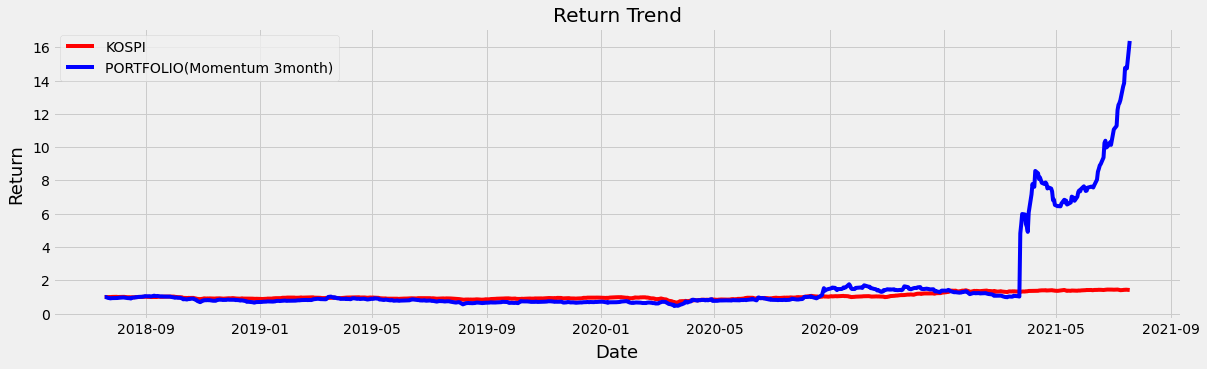

In [119]:
# 포트폴리오와 KOSPI 지수의 '누적 수익률 추이'를 시각화하여 비교

# matplotlib.pyplot 스타일시트 설정
plt.style.use('fivethirtyeight')

plt.figure(figsize=(18,5))
plt.plot(wealth.index, wealth.KOSPI , 'r', label='KOSPI')
plt.plot(wealth.index, wealth.PORTFOLIO ,'b', label="PORTFOLIO(Momentum 3month)")
plt.grid(True)
plt.title('Return Trend')
plt.xlabel('Date',fontsize=18, labelpad=7)
plt.ylabel('Return',fontsize=18, labelpad=7)
plt.legend(loc='best')
plt.show()

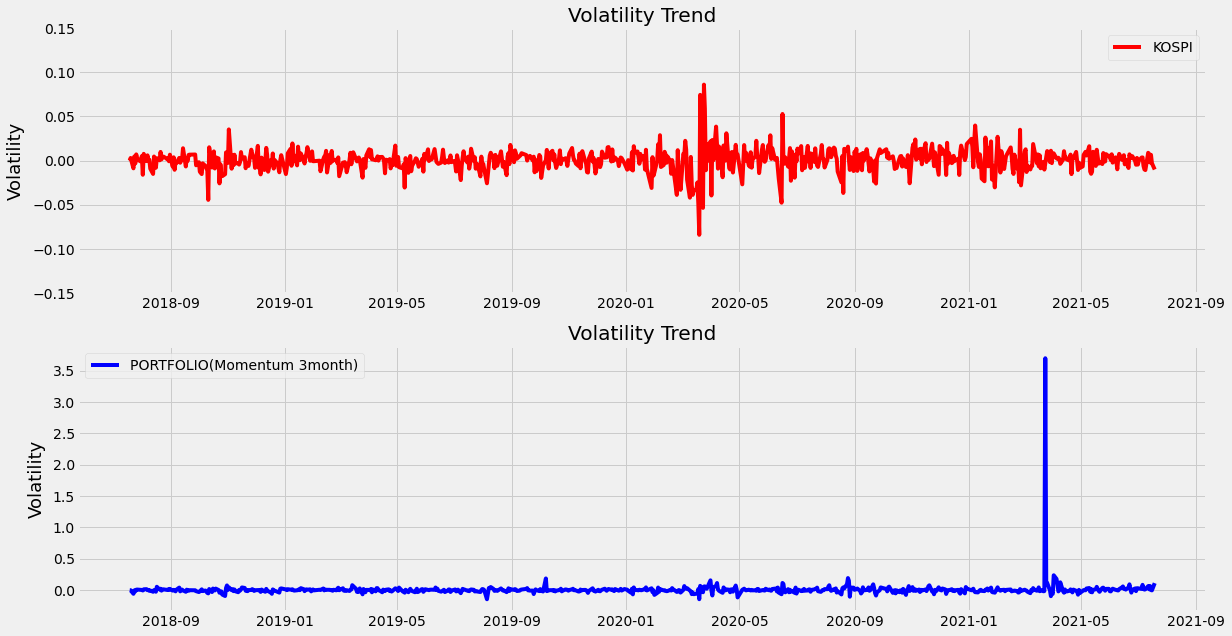

In [120]:
# 변동률 비교
plt.figure(figsize=(18,10))

plt.subplot(2,1,1)
plt.title('Volatility Trend')

plt.plot(result.index, result.KOSPI , 'r', label='KOSPI')
plt.yticks([-0.15, -0.10, -0.05, 0.00, 0.05, 0.10, 0.15])
plt.grid(True)
plt.ylabel('Volatility',fontsize=18, labelpad=7)
plt.legend(loc='best')

plt.subplot(2,1,2)
plt.title('Volatility Trend')
plt.plot(result.index, result.PORTFOLIO ,'b', label="PORTFOLIO(Momentum 3month)")
# plt.yticks([-0.15, -0.10, -0.05, 0.00, 0.05, 0.10, 0.15])
plt.ylabel('Volatility',fontsize=18, labelpad=7)
plt.legend(loc='best')

plt.grid(True)
plt.show()

In [121]:
print('----- Momentum 3month portfolio performance -----')
# Show Funds
print('Funds:', portfolio_val, 'KRW')

# Show Funds Remaining
print('Funds Remaining: ', leftover, ' KRW')

# Show Portfolio performance
ef.portfolio_performance(verbose=True)
rmse = da._allocation_rmse_error(verbose=False)

----- Momentum 3month portfolio performance -----
Funds: 15000000 KRW
Funds Remaining:  4010.0  KRW
Expected annual return: 2039.8%
Annual volatility: 47.7%
Sharpe Ratio: 42.71
Allocation has RMSE: 0.000


#### ver02> 결측값 삭제 ( 27개 종목 )

In [122]:
df2

,136510,065440,007390,102460,130660,151860,011000,043100,069640,196700,024740,185490,003925,215090,189860,049480,048550,001440,006660,002410,016920,189330,041510,205500,090150,171090,011700
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-19,10550,1597,8097,20695,3395,3765,4898,2356,8200,2385,1555,17066,208500,3032,4575,2425,2380,1140,10750,1735,1785,30500,40000,6060,1954,9899,2590
2018-07-20,10500,1656,7381,20695,3380,3750,4840,2646,8250,2350,1550,16648,209000,3052,4400,2425,2325,1130,10500,1750,1785,30200,38800,5990,1926,9866,2520
2018-07-23,10450,1585,6273,19616,3335,3650,4505,2486,8190,2295,1440,15170,209500,2909,4080,2475,2190,1095,10650,1620,1800,30000,37600,5870,1860,9665,2250
2018-07-24,10900,1614,6541,19420,3465,3730,4587,2377,8270,2298,1460,15170,209500,3110,4400,2450,2200,1155,10600,1665,1790,30300,38250,5890,1883,9665,2300
2018-07-25,10850,1568,6025,19028,3465,3650,4447,2369,8280,2298,1400,14373,206000,3039,4250,2350,2160,1135,10600,1650,1725,30300,38100,5860,1801,9498,2285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,39100,6060,29200,69000,15250,22300,46050,1685,12400,6680,4580,41000,399000,1740,11450,6320,3070,2840,26300,9500,5650,81800,65400,5710,5200,29800,3060
2021-07-14,40100,6340,30800,69500,14750,20950,47100,1770,14000,6510,5300,43350,393000,1750,10800,6700,3045,2845,26500,8900,5800,85000,65400,5950,5290,28850,3035
2021-07-15,37600,6470,30850,66900,15500,20950,49800,1830,13100,6950,5400,43300,390000,1710,11100,6650,3020,2815,26700,8860,5850,84700,64400,7200,5450,28600,3945


In [123]:
cleaned_weights2

OrderedDict([('136510', 0.01722),
             ('065440', 0.01582),
             ('007390', 0.02764),
             ('102460', 0.0),
             ('130660', 0.26139),
             ('151860', 0.12917),
             ('011000', 0.10272),
             ('043100', 0.0),
             ('069640', 0.0),
             ('196700', 0.0),
             ('024740', 0.08217),
             ('185490', 0.0),
             ('003925', 0.0),
             ('215090', 0.0),
             ('189860', 0.0),
             ('049480', 0.0),
             ('048550', 0.0),
             ('001440', 0.0),
             ('006660', 0.18589),
             ('002410', 0.05103),
             ('016920', 0.03991),
             ('189330', 0.05401),
             ('041510', 0.0),
             ('205500', 0.0),
             ('090150', 0.03304),
             ('171090', 0.0),
             ('011700', 0.0)])

In [124]:
len(cleaned_weights2)

27

In [125]:
# 각 일자별, 종목별 종가에 해당 weights를 곱해주기
for i, weight in cleaned_weights2.items():
    df2[i] = df2[i]*weight

In [126]:
df2

,136510,065440,007390,102460,130660,151860,011000,043100,069640,196700,024740,185490,003925,215090,189860,049480,048550,001440,006660,002410,016920,189330,041510,205500,090150,171090,011700
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-19,181.671,25.26454,223.80108,0.0,887.41905,486.32505,503.12256,0.0,0.0,0.0,127.77435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1998.3175,88.53705,71.23935,1647.305,0.0,0.0,64.56016,0.0,0.0
2018-07-20,180.810,26.19792,204.01084,0.0,883.49820,484.38750,497.16480,0.0,0.0,0.0,127.36350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1951.8450,89.30250,71.23935,1631.102,0.0,0.0,63.63504,0.0,0.0
2018-07-23,179.949,25.07470,173.38572,0.0,871.73565,471.47050,462.75360,0.0,0.0,0.0,118.32480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1979.7285,82.66860,71.83800,1620.300,0.0,0.0,61.45440,0.0,0.0
2018-07-24,187.698,25.53348,180.79324,0.0,905.71635,481.80410,471.17664,0.0,0.0,0.0,119.96820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1970.4340,84.96495,71.43890,1636.503,0.0,0.0,62.21432,0.0,0.0
2018-07-25,186.837,24.80576,166.53100,0.0,905.71635,471.47050,456.79584,0.0,0.0,0.0,115.03800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1970.4340,84.19950,68.84475,1636.503,0.0,0.0,59.50504,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,673.302,95.86920,807.08800,0.0,3986.19750,2880.49100,4730.25600,0.0,0.0,0.0,376.33860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4888.9070,484.78500,225.49150,4418.018,0.0,0.0,171.80800,0.0,0.0
2021-07-14,690.522,100.29880,851.31200,0.0,3855.50250,2706.11150,4838.11200,0.0,0.0,0.0,435.50100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4926.0850,454.16700,231.47800,4590.850,0.0,0.0,174.78160,0.0,0.0
2021-07-15,647.472,102.35540,852.69400,0.0,4051.54500,2706.11150,5115.45600,0.0,0.0,0.0,443.71800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4963.2630,452.12580,233.47350,4574.647,0.0,0.0,180.06800,0.0,0.0


In [127]:
# 일자별 종목의 (종가*비중) 합계를 Port열에 저장
df2['Port'] = df2.sum(axis = 1)
df2

,136510,065440,007390,102460,130660,151860,011000,043100,069640,196700,024740,185490,003925,215090,189860,049480,048550,001440,006660,002410,016920,189330,041510,205500,090150,171090,011700,Port
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-19,181.671,25.26454,223.80108,0.0,887.41905,486.32505,503.12256,0.0,0.0,0.0,127.77435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1998.3175,88.53705,71.23935,1647.305,0.0,0.0,64.56016,0.0,0.0,6305.33669
2018-07-20,180.810,26.19792,204.01084,0.0,883.49820,484.38750,497.16480,0.0,0.0,0.0,127.36350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1951.8450,89.30250,71.23935,1631.102,0.0,0.0,63.63504,0.0,0.0,6210.55665
2018-07-23,179.949,25.07470,173.38572,0.0,871.73565,471.47050,462.75360,0.0,0.0,0.0,118.32480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1979.7285,82.66860,71.83800,1620.300,0.0,0.0,61.45440,0.0,0.0,6118.68347
2018-07-24,187.698,25.53348,180.79324,0.0,905.71635,481.80410,471.17664,0.0,0.0,0.0,119.96820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1970.4340,84.96495,71.43890,1636.503,0.0,0.0,62.21432,0.0,0.0,6198.24518
2018-07-25,186.837,24.80576,166.53100,0.0,905.71635,471.47050,456.79584,0.0,0.0,0.0,115.03800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1970.4340,84.19950,68.84475,1636.503,0.0,0.0,59.50504,0.0,0.0,6146.68074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,673.302,95.86920,807.08800,0.0,3986.19750,2880.49100,4730.25600,0.0,0.0,0.0,376.33860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4888.9070,484.78500,225.49150,4418.018,0.0,0.0,171.80800,0.0,0.0,23738.55180
2021-07-14,690.522,100.29880,851.31200,0.0,3855.50250,2706.11150,4838.11200,0.0,0.0,0.0,435.50100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4926.0850,454.16700,231.47800,4590.850,0.0,0.0,174.78160,0.0,0.0,23854.72140
2021-07-15,647.472,102.35540,852.69400,0.0,4051.54500,2706.11150,5115.45600,0.0,0.0,0.0,443.71800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4963.2630,452.12580,233.47350,4574.647,0.0,0.0,180.06800,0.0,0.0,24322.92920


In [128]:
# 일자별 종가의 전일대비 변동률(수익률)을 portfolio라는 데이터프레임으로 저장
portfolio2 = df2[['Port']].pct_change()
portfolio2

,Port
Date,
2018-07-19,NaN
2018-07-20,-0.015032
2018-07-23,-0.014793
2018-07-24,0.013003
2018-07-25,-0.008319
...,...
2021-07-13,-0.019722
2021-07-14,0.004894
2021-07-15,0.019627


In [129]:
# 코스피지수 불러오기
kospi = fdr.DataReader('KS11', start_date, end_date)[['Close']]
kospi

,Close
Date,
2018-07-19,2282.29
2018-07-20,2289.19
2018-07-23,2269.31
2018-07-24,2280.20
2018-07-25,2273.03
...,...
2021-07-13,3271.38
2021-07-14,3264.81
2021-07-15,3286.22


In [130]:
# 코스피지수의 변동률(수익률) 구하기
# 변동률(수익률) = (당일가격-전일가격) / 전일가격
# 7/20의 변동률(수익률) = (7/20 가격-7-19 가격) / 7/19 가격
kospi_pct = kospi.pct_change()
kospi_pct

,Close
Date,
2018-07-19,NaN
2018-07-20,0.003023
2018-07-23,-0.008684
2018-07-24,0.004799
2018-07-25,-0.003144
...,...
2021-07-13,0.007673
2021-07-14,-0.002008
2021-07-15,0.006558


In [131]:
# 코스피와 포트폴리오 합치기
result2 = kospi_pct.join(portfolio2)
result2

,Close,Port
Date,,
2018-07-19,NaN,NaN
2018-07-20,0.003023,-0.015032
2018-07-23,-0.008684,-0.014793
2018-07-24,0.004799,0.013003
2018-07-25,-0.003144,-0.008319
...,...,...
2021-07-13,0.007673,-0.019722
2021-07-14,-0.002008,0.004894
2021-07-15,0.006558,0.019627


In [132]:
# 1열을 0으로 
result2.iloc[0] = 0
result2

,Close,Port
Date,,
2018-07-19,0.000000,0.000000
2018-07-20,0.003023,-0.015032
2018-07-23,-0.008684,-0.014793
2018-07-24,0.004799,0.013003
2018-07-25,-0.003144,-0.008319
...,...,...
2021-07-13,0.007673,-0.019722
2021-07-14,-0.002008,0.004894
2021-07-15,0.006558,0.019627


In [133]:
# 열 이름 변경
result2.columns = ['KOSPI', 'PORTFOLIO']
result2

,KOSPI,PORTFOLIO
Date,,
2018-07-19,0.000000,0.000000
2018-07-20,0.003023,-0.015032
2018-07-23,-0.008684,-0.014793
2018-07-24,0.004799,0.013003
2018-07-25,-0.003144,-0.008319
...,...,...
2021-07-13,0.007673,-0.019722
2021-07-14,-0.002008,0.004894
2021-07-15,0.006558,0.019627


In [134]:
# 1에서 시작해서, 전일대비 변동률(수익률)을 적용하여 수치화하기
wealth2 = (1+result2).cumprod()
wealth2

,KOSPI,PORTFOLIO
Date,,
2018-07-19,1.000000,1.000000
2018-07-20,1.003023,0.984968
2018-07-23,0.994313,0.970398
2018-07-24,0.999084,0.983016
2018-07-25,0.995943,0.974838
...,...,...
2021-07-13,1.433376,3.764835
2021-07-14,1.430497,3.783259
2021-07-15,1.439878,3.857515


## 시각화

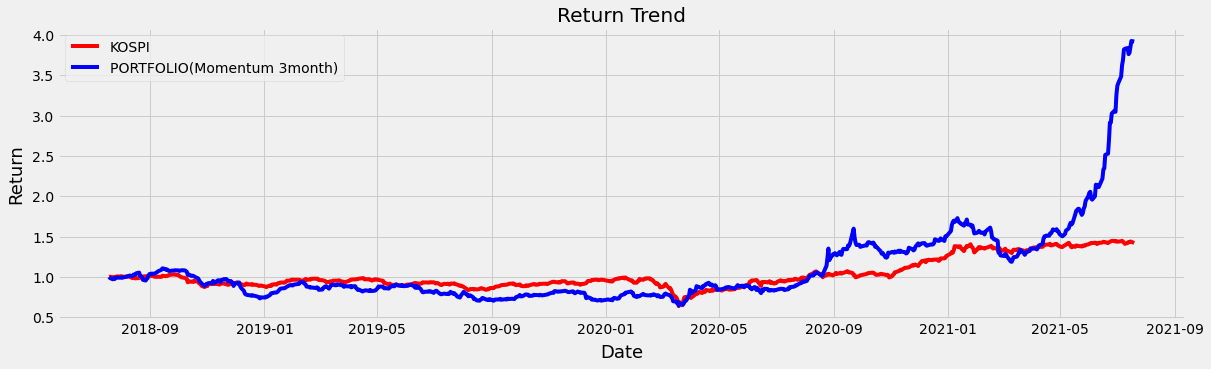

In [135]:
# 포트폴리오와 KOSPI 지수의 '누적 수익률 추이'를 시각화하여 비교

# matplotlib.pyplot 스타일시트 설정
plt.style.use('fivethirtyeight')

plt.figure(figsize=(18,5))
plt.plot(wealth2.index, wealth2.KOSPI , 'r', label='KOSPI')
plt.plot(wealth2.index, wealth2.PORTFOLIO ,'b', label="PORTFOLIO(Momentum 3month)")
plt.grid(True)
plt.title('Return Trend')
plt.xlabel('Date',fontsize=18, labelpad=7)
plt.ylabel('Return',fontsize=18, labelpad=7)
plt.legend(loc='best')
plt.show()

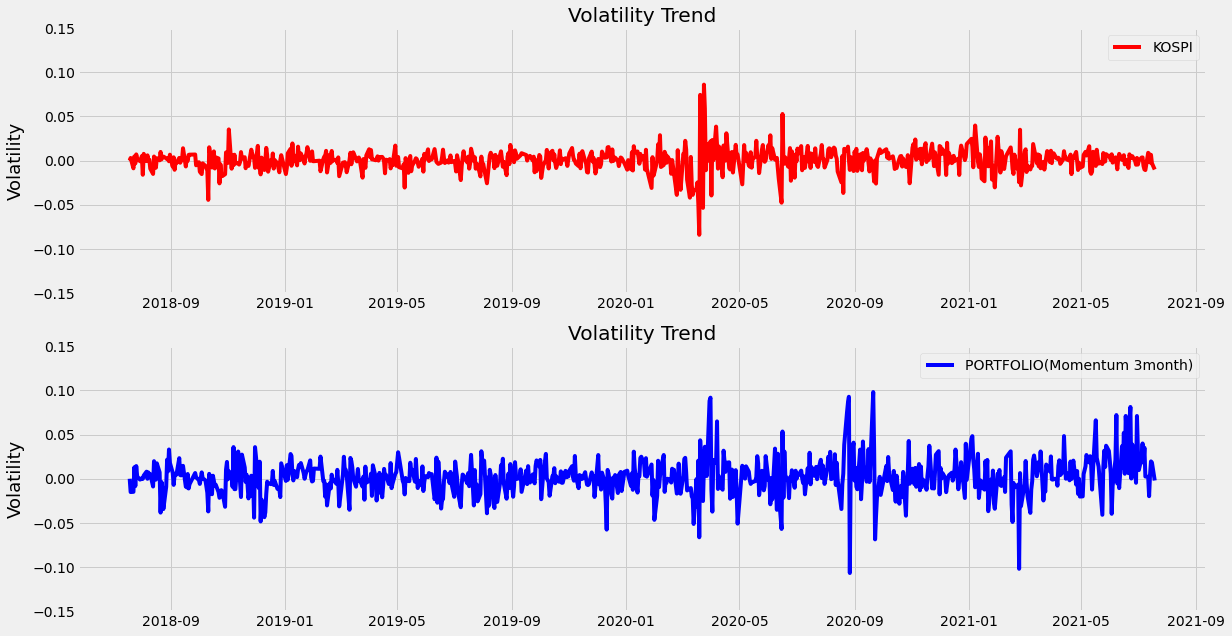

In [136]:
# 변동률 비교
plt.figure(figsize=(18,10))

plt.subplot(2,1,1)
plt.title('Volatility Trend')

plt.plot(result2.index, result2.KOSPI , 'r', label='KOSPI')
plt.yticks([-0.15, -0.10, -0.05, 0.00, 0.05, 0.10, 0.15])
plt.grid(True)
plt.ylabel('Volatility',fontsize=18, labelpad=7)
plt.legend(loc='best')

plt.subplot(2,1,2)
plt.title('Volatility Trend')
plt.plot(result2.index, result2.PORTFOLIO ,'b', label="PORTFOLIO(Momentum 3month)")
plt.yticks([-0.15, -0.10, -0.05, 0.00, 0.05, 0.10, 0.15])
plt.ylabel('Volatility',fontsize=18, labelpad=7)
plt.legend(loc='best')

plt.grid(True)
plt.show()

In [138]:
print('-----  Momentum 3month portfolio performance -----')
# Show Funds
print('Funds:', portfolio_val, 'KRW')

# Show Funds Remaining
print('Funds Remaining: ', leftover2, ' KRW')

# Show Portfolio performance
ef2.portfolio_performance(verbose=True)
rmse2 = da2._allocation_rmse_error(verbose=False)

-----  Momentum 3month portfolio performance -----
Funds: 15000000 KRW
Funds Remaining:  750.0  KRW
Expected annual return: 65.2%
Annual volatility: 28.0%
Sharpe Ratio: 2.25
Allocation has RMSE: 0.001
